In [1]:
%who

Interactive namespace is empty.


In [2]:
import xarray as xr
import numpy as np
import geopandas as gpd
import datetime
import matplotlib

# getting the spatial plotting function from another directory
import sys
new_path = '/home/566/ad9701/drought_probability/final_code_AU/'
if new_path not in sys.path:
    sys.path.append(new_path)
import validation_functions as myfuncs

In [3]:
data_dir = '/g/data/w97/ad9701/drought_2017to2020/precip_data/'
agcd_file = 'agcd_monthly_1900_2020.nc'
chirps_file = 'chirps_monthly_1981_2021.nc'
mswep_file = 'precipitation_mswep_monthly_1979_2021.nc'

ds_agcd = xr.open_dataset(data_dir + agcd_file)
ds_chirps = xr.open_dataset(data_dir + chirps_file)
ds_mswep = xr.open_dataset(data_dir + mswep_file)

### Region average data for Ben Henley's analysis

In [4]:
# read mask from saved files
mask_file = '/g/data/w97/ad9701/drought_2017to2020/AGCD_mask_drought_focusArea.nc'
ds_agcd_mask = xr.open_dataset(mask_file)
da_agcd_mask = ds_agcd_mask['mask']

mask_file = '/g/data/w97/ad9701/drought_2017to2020/CHIRPS_mask_drought_focusArea.nc'
ds_chirps_mask = xr.open_dataset(mask_file)
da_chirps_mask = ds_chirps_mask['mask']

mask_file = '/g/data/w97/ad9701/drought_2017to2020/MSWEP_mask_drought_focusArea.nc'
ds_mswep_mask = xr.open_dataset(mask_file)
da_mswep_mask = ds_mswep_mask['mask']

In [5]:
da_agcd_masked = ds_agcd['precip']*da_agcd_mask
da_agcd_regAvg = myfuncs.calc_areaAvg(da_agcd_masked)

da_chirps_masked = ds_chirps['precip']*da_chirps_mask
da_chirps_regAvg = myfuncs.calc_areaAvg(da_chirps_masked)

da_mswep_masked = ds_mswep['precipitation']*da_mswep_mask
da_mswep_regAvg = myfuncs.calc_areaAvg(da_mswep_masked)

In [33]:
# keep the original attributes

da_chirps_regAvg = da_chirps_regAvg.assign_attrs(ds_chirps['precip'].attrs)
da_chirps_regAvg

<xarray.DataArray (time: 492)>
array([ 22.32813116,  53.07207174,  27.49891473,  25.27113615,
        71.79725972,  42.37787834,  55.91098281,  21.05732648,
        17.6184738 ,  34.25634068,  49.94855777,  32.21176833,
        51.0327446 ,  24.8890869 ,  68.3609523 ,  14.48515221,
        21.36460969,  14.34700518,  13.59346395,  10.69228737,
        22.4528006 ,  19.97469768,  11.13382645,  38.23486319,
        39.86389723,  32.94172655,  48.9441815 ,  63.03412795,
        91.91092076,  31.25543486,  30.69886935,  43.44363626,
        29.58122942,  43.6633802 ,  73.1202476 ,  50.70147993,
       138.25509754,  41.47206109,  26.67336017,  46.97379777,
        12.63718375,  17.38424512,  82.24157622,  31.18223061,
        28.48166257,  39.92800115,  33.69682832,  29.26502905,
        26.77210689,  32.37310594,  25.9549485 ,  22.72968175,
        29.42970675,  26.29188277,  29.70157735,  55.28309851,
        20.5570175 ,  56.43144682,  60.38723409,  54.63102705,
        35.45579709,  29.6802021 ,  10.83199455,  14.51269797,
        35.89163966,  13.17668013,  52.33664429,  38.13083018,
        31.25597171,  48.47609227,  47.53913219,  32.50150877,
        61.59584407,  36.49055357,  42.84368162,  13.16910635,
        37.28147918,  37.47025968,  21.02097718,  45.50289363,
...
        33.86863407,  41.04648023,  32.52747058,  29.82305688,
        14.44038395,  26.30425876,  46.72583754,  45.94523361,
        74.96518748,  22.63692849,  31.47908061,  20.12717838,
        47.48851019,  74.06604576,  36.83646289,  44.80783257,
        77.79598714,  35.57800712,  25.42673421,  51.97502541,
        46.35909433,  25.54663408,  66.05296132,  23.89348852,
        29.57399174,  17.09809125,  20.53201421,  20.91661993,
        11.571849  ,  53.31655943,  41.07727332,  52.91022857,
        34.32098232,  38.80286663,  33.48630852,  14.26337746,
        21.95593631,  23.24773447,  14.88950545,  22.68390271,
        14.14195847,  44.41664059,  44.93849943,  34.24853848,
        30.26224719,  16.78796738,  57.47540624,  27.58135067,
        28.02535053,  19.97221028,  16.89093148,  14.94400757,
        15.40116998,  20.43474633,  26.91067416,  13.15146299,
        50.87795593,  75.13748186,  62.206675  ,  50.98145738,
        23.23092714,  20.13175026,  28.832669  ,  39.4717725 ,
        30.22167424,  52.53480376,  19.84967007,  59.88994803,
        52.69825276,  49.33313173, 100.96700348,  13.48352884,
        25.0475316 ,  45.84589779,  37.40634922,  22.9465581 ,
        35.21342627,  35.24165416, 113.43716618,  49.4610122 ])
Coordinates:
  * time     (time) datetime64[ns] 1981-01-01 1981-02-01 ... 2021-12-01
Attributes:
    units:               mm/month
    standard_name:       convective precipitation rate
    long_name:           Climate Hazards group InfraRed Precipitation with St...
    time_step:           month
    geostatial_lat_min:  -50.0
    geostatial_lat_max:  50.0
    geostatial_lon_min:  -180.0
    geostatial_lon_max:  180.0

In [20]:
ds_chirps_orig = xr.open_dataset('/g/data/w97/ad9701/CHIRPS-2.0/global_monthly/netcdf/chirps-v2.0.monthly.nc')
ds_chirps_orig.attrs

{'Conventions': 'CF-1.6',
 'title': 'CHIRPS Version 2.0',
 'history': 'created by Climate Hazards Group',
 'version': 'Version 2.0',
 'date_created': '2022-01-18',
 'creator_name': 'Pete Peterson',
 'creator_email': 'pete@geog.ucsb.edu',
 'institution': 'Climate Hazards Group.  University of California at Santa Barbara',
 'documentation': 'http://pubs.usgs.gov/ds/832/',
 'reference': 'Funk, C.C., Peterson, P.J., Landsfeld, M.F., Pedreros, D.H., Verdin, J.P., Rowland, J.D., Romero, B.E., Husak, G.J., Michaelsen, J.C., and Verdin, A.P., 2014, A quasi-global precipitation time series for drought monitoring: U.S. Geological Survey Data Series 832, 4 p., http://dx.doi.org/110.3133/ds832. ',
 'comments': ' time variable denotes the first day of the given month.',
 'acknowledgements': 'The Climate Hazards Group InfraRed Precipitation with Stations development process was carried out through U.S. Geological Survey (USGS) cooperative agreement #G09AC000001 "Monitoring and Forecasting Climate, W

In [31]:
ds_chirps_regAvg = da_chirps_regAvg.to_dataset(name = 'precip')
ds_chirps_regAvg = ds_chirps_regAvg.assign_attrs(ds_chirps_orig.attrs)
ds_chirps_regAvg

<xarray.Dataset>
Dimensions:  (time: 492)
Coordinates:
  * time     (time) datetime64[ns] 1981-01-01 1981-02-01 ... 2021-12-01
Data variables:
    precip   (time) float64 22.33 53.07 27.5 25.27 ... 35.21 35.24 113.4 49.46
Attributes: (12/15)
    Conventions:       CF-1.6
    title:             CHIRPS Version 2.0
    history:           created by Climate Hazards Group
    version:           Version 2.0
    date_created:      2022-01-18
    creator_name:      Pete Peterson
    ...                ...
    reference:         Funk, C.C., Peterson, P.J., Landsfeld, M.F., Pedreros,...
    comments:           time variable denotes the first day of the given month.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ

In [34]:
out_dir = '/g/data/w97/ad9701/drought_2017to2020/precip_data/drought_focusRegavg/'
ds_chirps_regAvg.to_netcdf(out_dir + chirps_file)

In [7]:
out_dir = '/g/data/w97/ad9701/drought_2017to2020/precip_data/drought_focusRegavg/'
da_agcd_regAvg = da_agcd_regAvg.assign_attrs(ds_agcd['precip'].attrs)
ds_agcd_orig = xr.open_dataset('/g/data/zv2/agcd/v1/precip/total/r005/01month/agcd_v1_precip_total_r005_monthly_2020.nc')
ds_agcd_regAvg = da_agcd_regAvg.to_dataset(name = 'precip')
ds_agcd_regAvg = ds_agcd_regAvg.assign_attrs(ds_agcd_orig.attrs)
ds_agcd_regAvg.to_netcdf(out_dir + agcd_file)

In [8]:
out_dir = '/g/data/w97/ad9701/drought_2017to2020/precip_data/drought_focusRegavg/'
da_mswep_regAvg = da_mswep_regAvg.assign_attrs(ds_mswep['precipitation'].attrs)
ds_mswep_regAvg = da_mswep_regAvg.to_dataset(name = 'precipitation')
ds_mswep_regAvg.to_netcdf(out_dir + mswep_file)

### Continue with monthly plots

In [8]:
%who

agcd_file	 chirps_file	 da_agcd_lt_monClim	 da_agcd_mask	 da_agcd_monAnom	 da_chirps_lt_monClim	 da_chirps_mask	 da_chirps_monAnom	 da_mswep_lt_monClim	 
da_mswep_mask	 da_mswep_monAnom	 data_dir	 datetime	 drought_focusReg	 ds_agcd	 ds_agcd_mask	 ds_chirps	 ds_chirps_mask	 
ds_mswep	 ds_mswep_mask	 gpd	 mask_file	 matplotlib	 mswep_file	 myfuncs	 new_path	 np	 
regionmask	 sys	 time_slice	 xr	 


In [7]:
# the monthly climatology from long-term data
time_slice = slice('1981-01-01', '2020-05-31')
da_agcd_lt_monClim = ds_agcd['precip'].sel(time = time_slice).groupby('time.month').mean('time')
da_chirps_lt_monClim = ds_chirps['precip'].sel(time = time_slice).groupby('time.month').mean('time')
da_mswep_lt_monClim = ds_mswep['precipitation'].sel(time = time_slice).groupby('time.month').mean('time')

# the monthly anomalies during the drought period
time_slice = slice('2016-12-01', '2020-12-31')
da_agcd_monAnom = ds_agcd['precip'].sel(time = time_slice).groupby('time.month') - da_agcd_lt_monClim
da_chirps_monAnom = ds_chirps['precip'].sel(time = time_slice).groupby('time.month') - da_chirps_lt_monClim
da_mswep_monAnom = ds_mswep['precipitation'].sel(time = time_slice).groupby('time.month') - da_mswep_lt_monClim

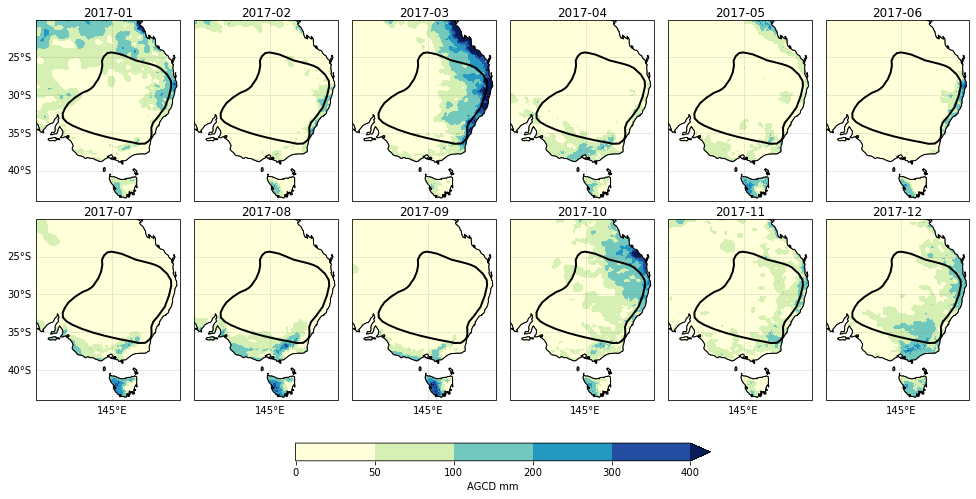

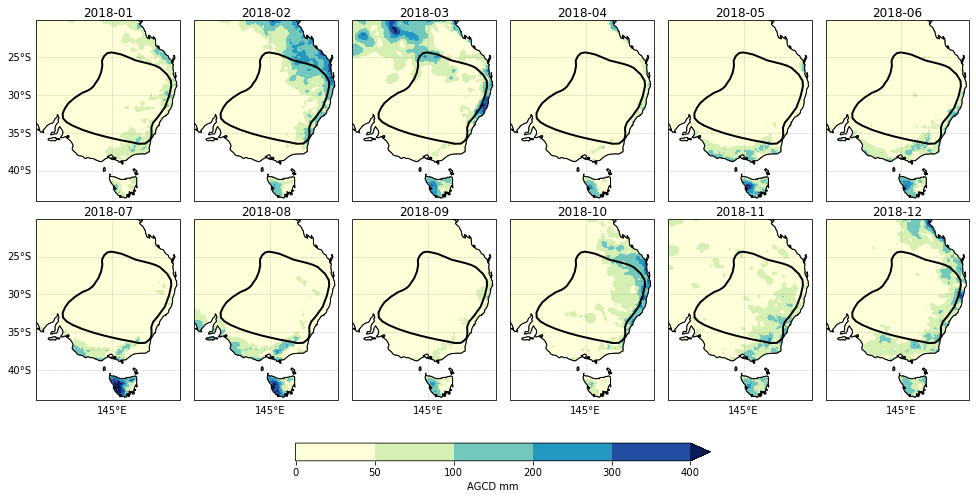

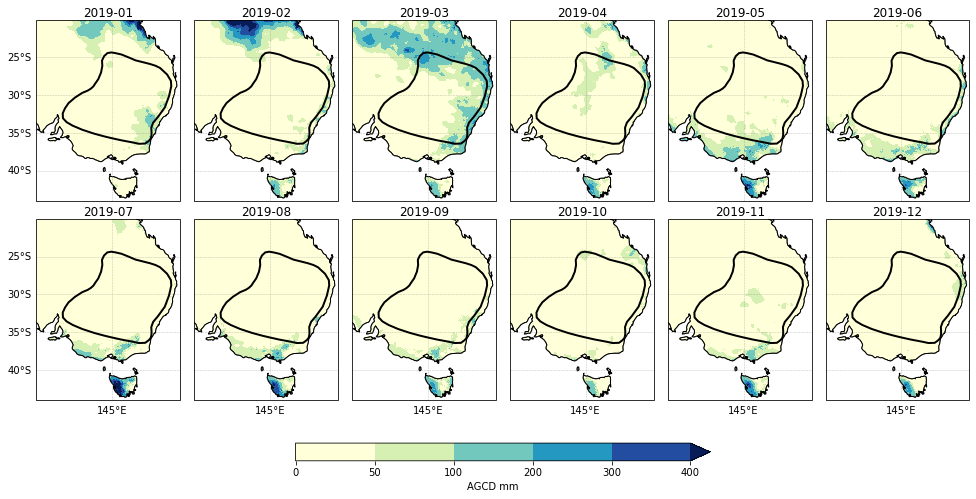

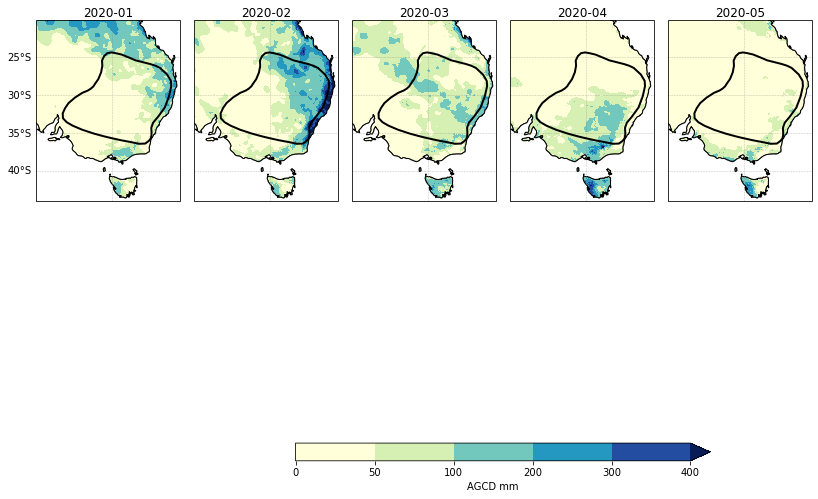

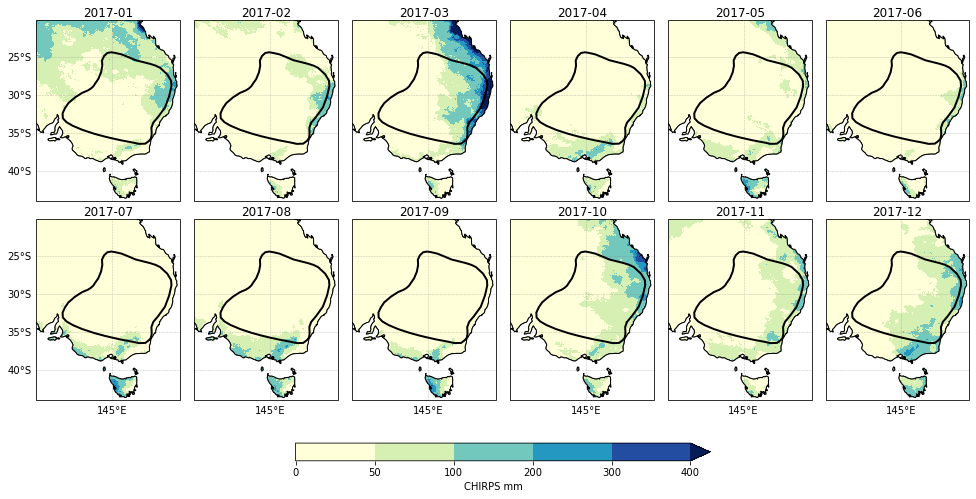

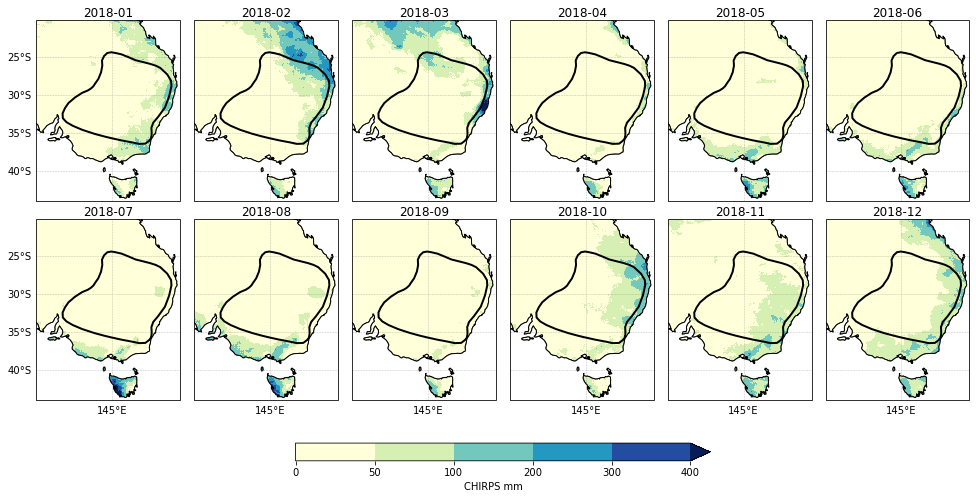

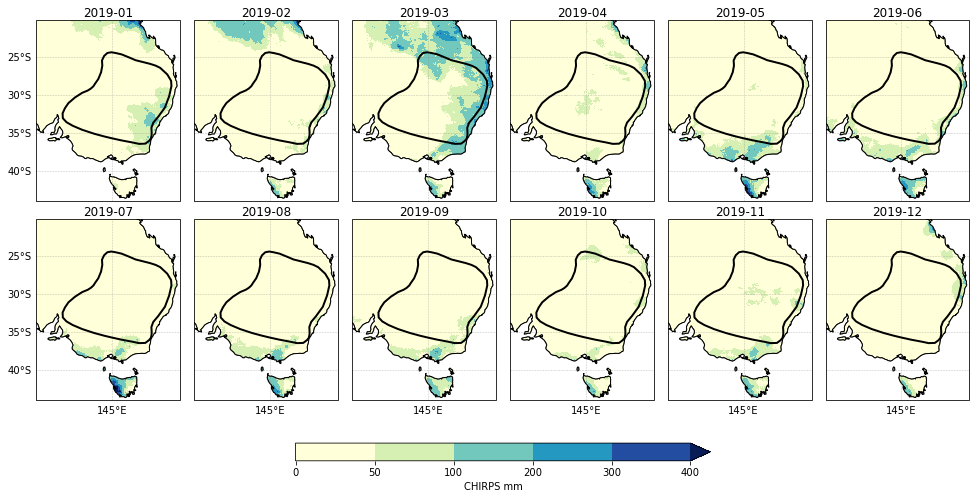

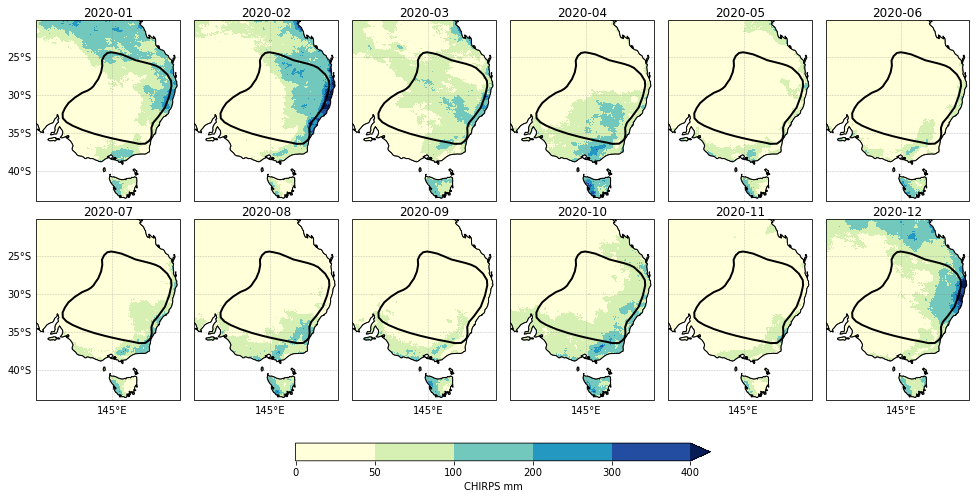

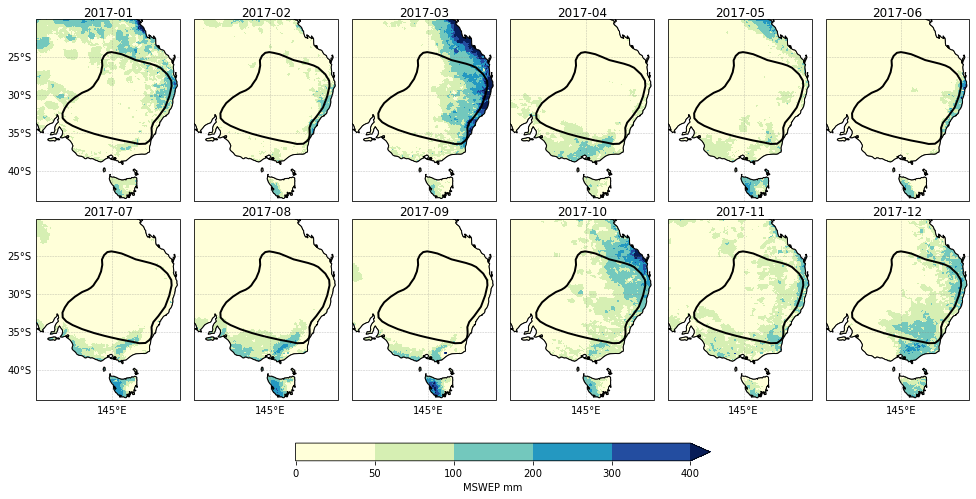

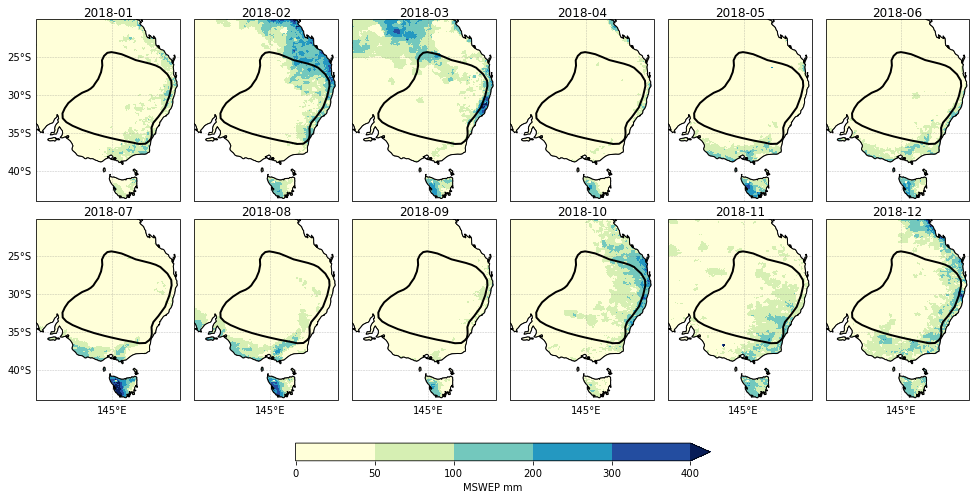

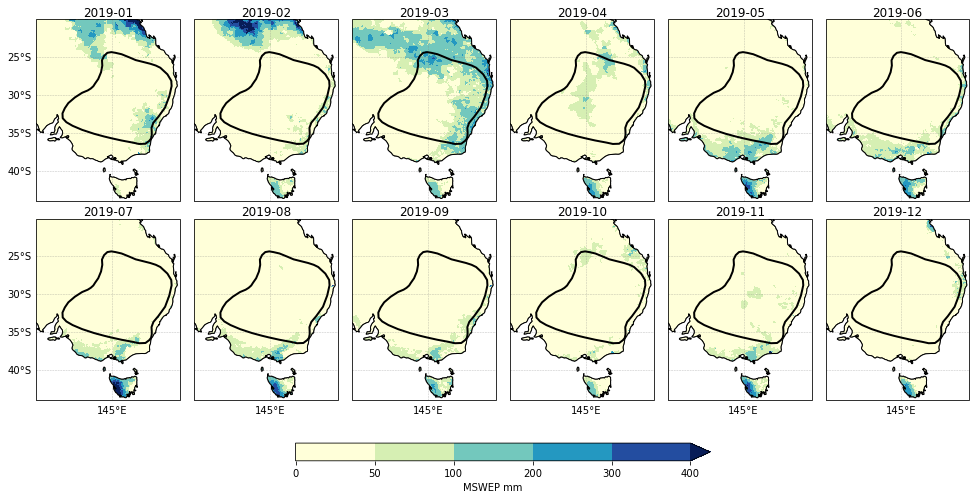

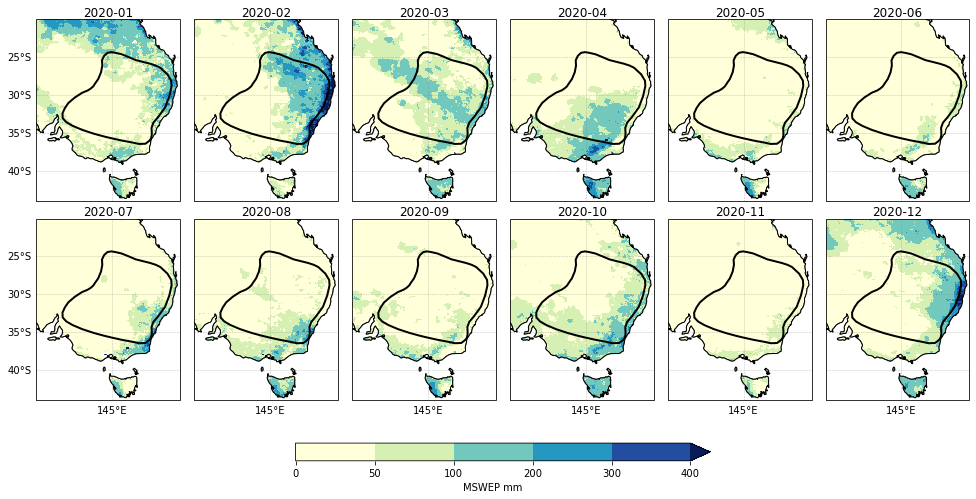

In [8]:
out_dir = 'figures/drought_2017to2020/precip/'
figname_prefix = 'precip_monMean'

sh_file = '/g/data/w97/ad9701/drought_2017to2020/drought_focusArea/smooth_polygon_drought_focusArea.shp'

current_cmap = matplotlib.cm.get_cmap("YlGnBu").copy()
current_cmap.set_bad(color='lightgrey')

# only the southeast
lat_slice_small = slice(-20, -44)
lat_slice_small_rev = slice(-44, -20)
lon_slice_small = slice(135, 154)

time_slice = slice('2017-01-01', '2020-12-31')
data_list = [ds_agcd['precip'].sel(time = time_slice), ds_chirps['precip'].sel(time = time_slice), ds_mswep['precipitation'].sel(time = time_slice)]
data_names = ['AGCD', 'CHIRPS', 'MSWEP']
data_lat_slices = {'AGCD': lat_slice_small_rev,
                   'CHIRPS': lat_slice_small_rev,
                   'MSWEP': lat_slice_small}
    
for iDat in range(len(data_list)):  
    for year in [2017, 2018, 2019, 2020]:
        da_year = data_list[iDat].sel(time = str(year), lat=data_lat_slices[data_names[iDat]], lon=lon_slice_small)
        plot_list = [da_year.isel(time = i) for i in range(len(da_year.time.values))] 

        # find the months for which the values are missing & place an empty data array there
        # mon_array = np.array(range(1, 13))
        # nanInd = [x not in da_year['time.month'].values for x in mon_array]
        # for i in range(len(nanInd)):
        #     if nanInd[i]:
        #         da_temp = da_nan.sel(lat=lat_slice_small, lon=lon_slice_small).assign_coords({'time':datetime.datetime(year,i+1,15)})
        #         plot_list.insert(i, da_temp)

        subplot_title = [np.datetime_as_string(x.time.values, unit='M') for x in plot_list]
        # for i in range(len(nanInd)):
        #     if nanInd[i]:
        #         subplot_title[i] = np.datetime_as_string(plot_list[i].time.values, unit='M') + ', missing'

        levels = [0, 50, 100, 200, 300, 400]
        out_figname = data_names[iDat] + '_' + figname_prefix + '_' + str(year)
        myfuncs.draw_pcolormesh_Npanels(plot_list, cmap = current_cmap, ncols = 6, nrows = 2, panel_width=2.4, panel_height=4.1, levels=levels, 
                                        subplot_title = subplot_title, shapefile = sh_file, shapefile_color = 'black',
                                        out_dir = out_dir, out_figname = out_figname, cbar_label=data_names[iDat]+' mm', cbar_extend='max')

## Anomalies from monthly climatology

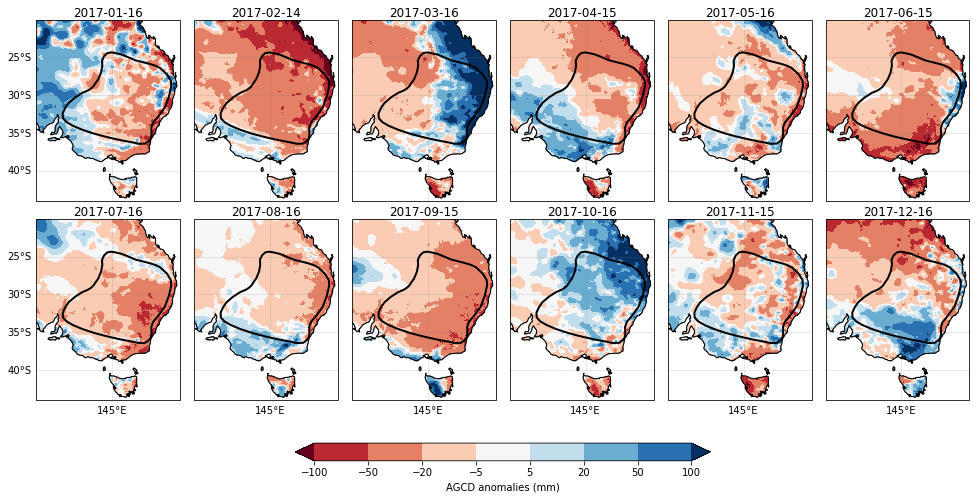

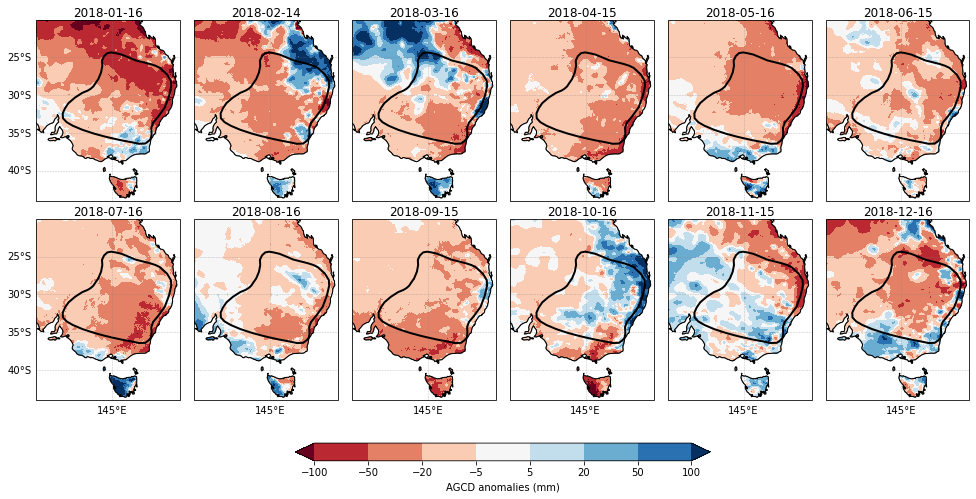

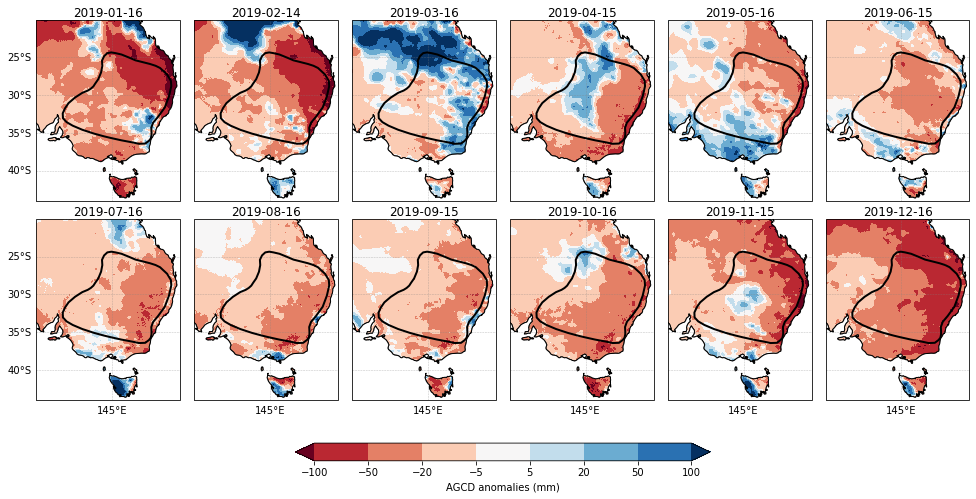

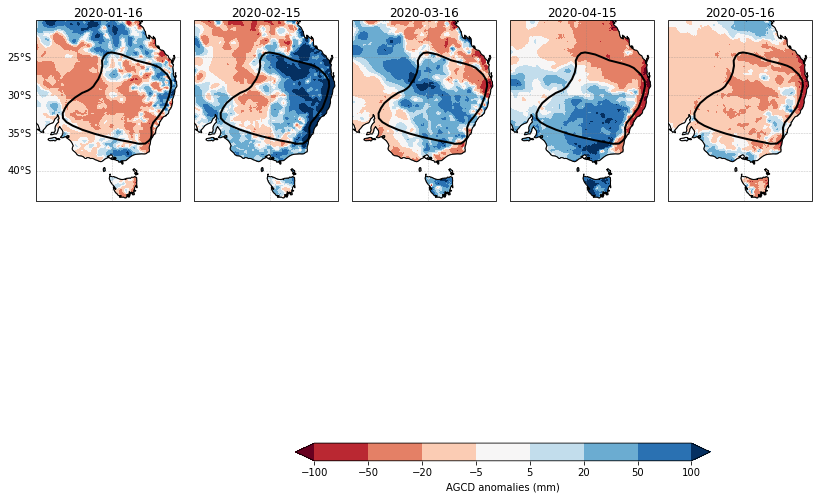

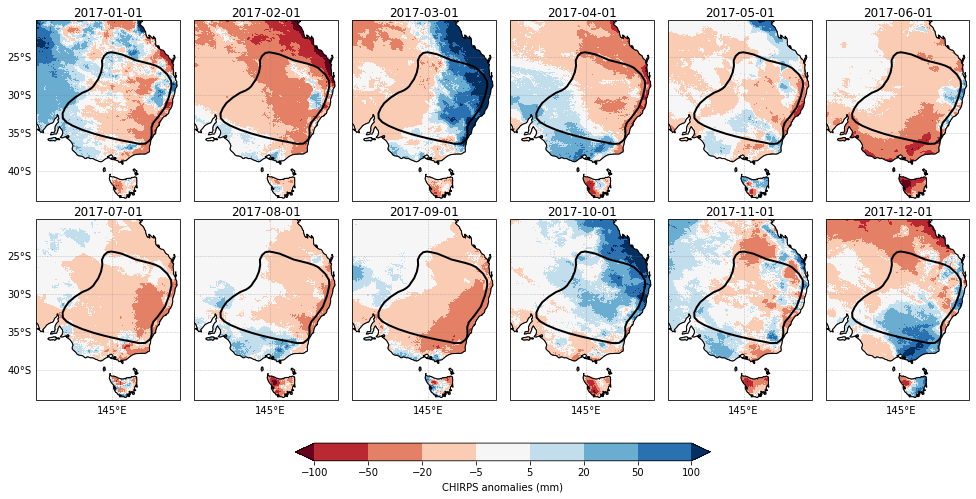

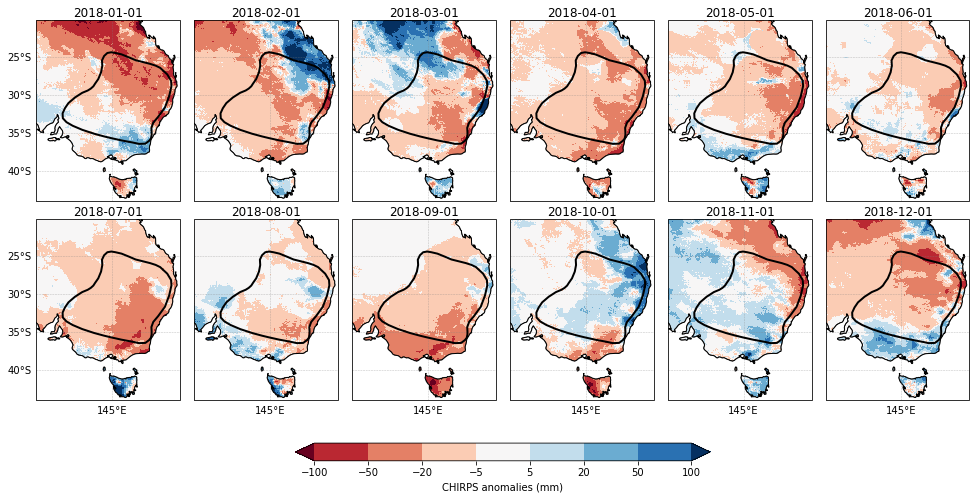

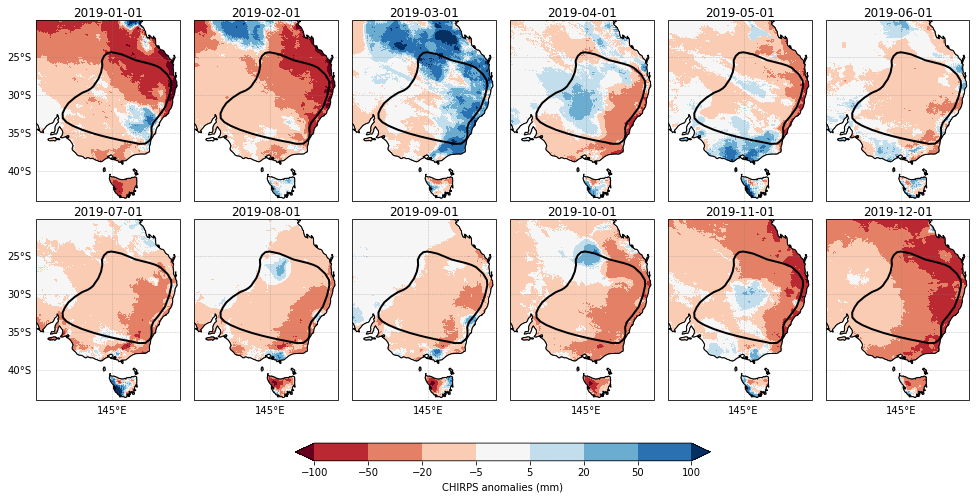

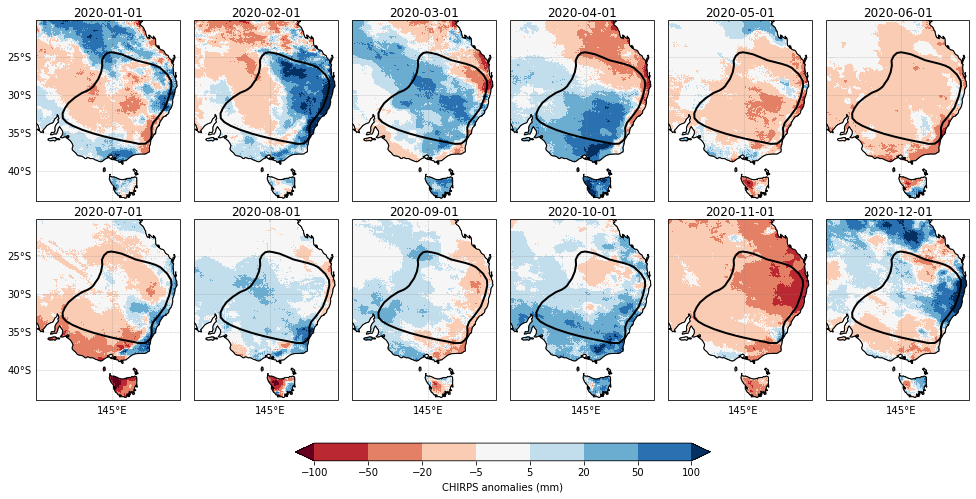

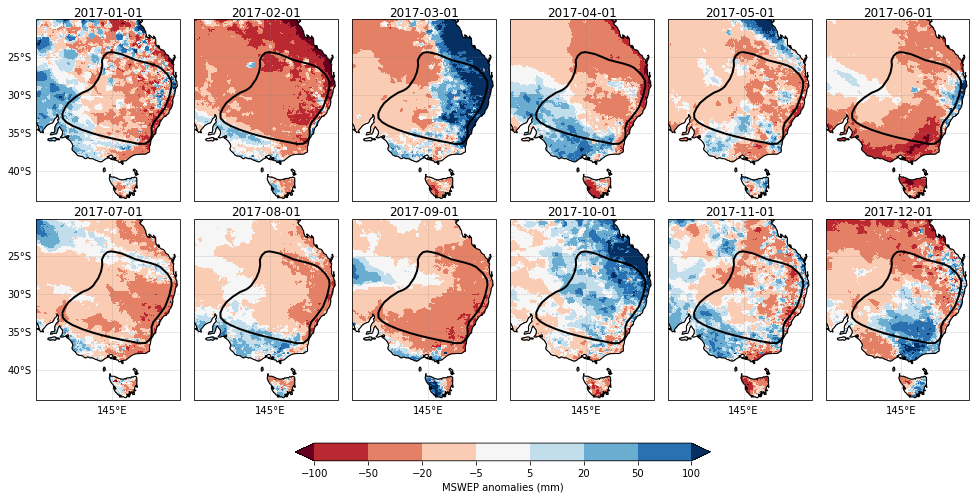

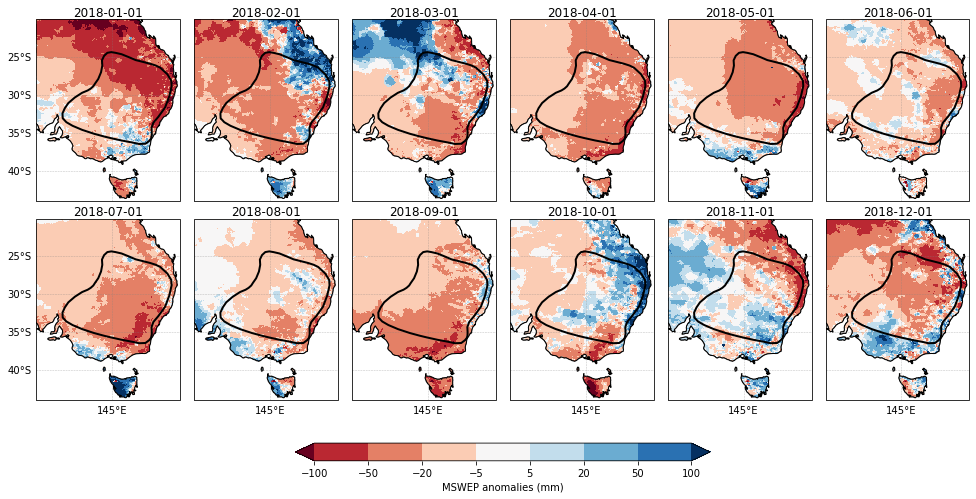

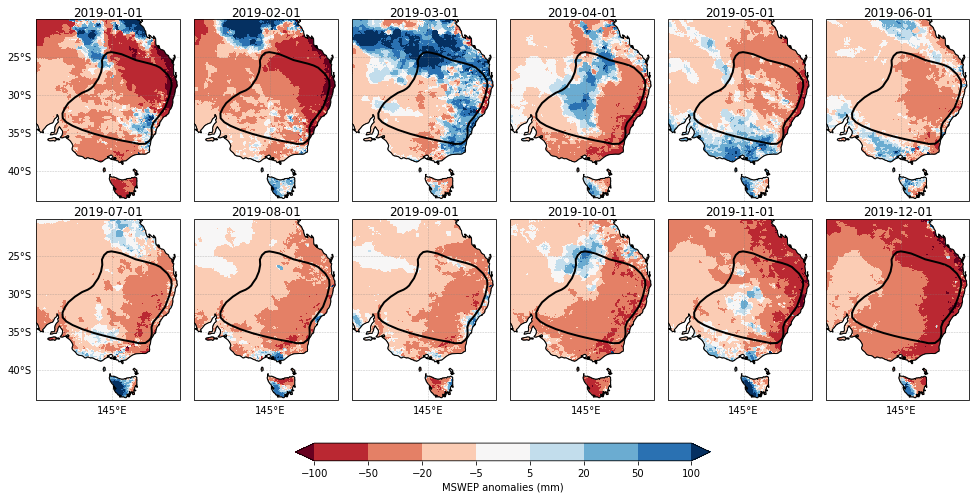

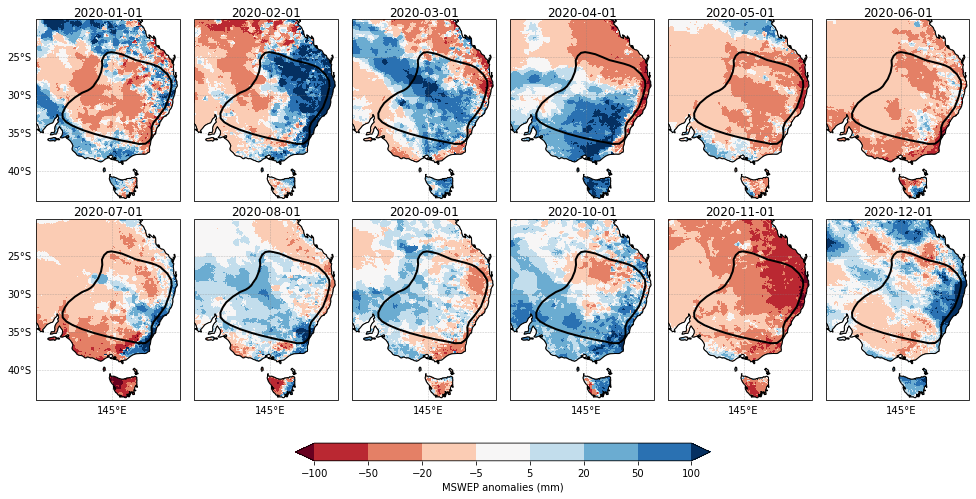

In [10]:
out_dir = 'figures/drought_2017to2020/precip/'
figname_prefix = 'precip_monMean'

sh_file = '/g/data/w97/ad9701/drought_2017to2020/drought_focusArea/smooth_polygon_drought_focusArea.shp'

current_cmap = matplotlib.cm.get_cmap("RdBu").copy()
current_cmap.set_bad(color='lightgrey')

# only the southeast
lat_slice_small = slice(-20, -44)
lat_slice_small_rev = slice(-44, -20)
lon_slice_small = slice(135, 154)

data_list = [da_agcd_monAnom, da_chirps_monAnom, da_mswep_monAnom]
data_names = ['AGCD', 'CHIRPS', 'MSWEP']
data_lat_slices = {'AGCD': lat_slice_small_rev,
                   'CHIRPS': lat_slice_small_rev,
                   'MSWEP': lat_slice_small}
    
for iDat in range(len(data_list)):  
    for year in [2017, 2018, 2019, 2020]:
        da_year = data_list[iDat].sel(time = str(year), lat=data_lat_slices[data_names[iDat]], lon=lon_slice_small)
        plot_list = [da_year.isel(time = i) for i in range(len(da_year.time.values))] 

        # find the months for which the values are missing & place an empty data array there
        # mon_array = np.array(range(1, 13))
        # nanInd = [x not in da_year['time.month'].values for x in mon_array]
        # for i in range(len(nanInd)):
        #     if nanInd[i]:
        #         da_temp = da_nan.sel(lat=lat_slice_small, lon=lon_slice_small).assign_coords({'time':datetime.datetime(year,i+1,15)})
        #         plot_list.insert(i, da_temp)

        subplot_title = [np.datetime_as_string(x.time.values, unit='D') for x in plot_list]
        # for i in range(len(nanInd)):
        #     if nanInd[i]:
        #         subplot_title[i] = np.datetime_as_string(plot_list[i].time.values, unit='M') + ', missing'

        levels = [-100, -50, -20, -5, 5, 20, 50, 100]
        out_figname = data_names[iDat] + '_' + figname_prefix + '_' + str(year)
        myfuncs.draw_pcolormesh_Npanels(plot_list, cmap = current_cmap, ncols = 6, nrows = 2, panel_width=2.4, panel_height=4.1, levels=levels, 
                                        subplot_title = subplot_title, shapefile = sh_file, shapefile_color = 'black',
                                        out_dir = out_dir, out_figname = out_figname, cbar_label=data_names[iDat]+' anomalies (mm)') #, cbar_extend='max')

### Area averages 
Quatifying deficit in rainfall

In [6]:
%who

agcd_file	 chirps_file	 da_agcd_lt_monClim	 da_agcd_monAnom	 da_chirps_lt_monClim	 da_chirps_monAnom	 da_mswep_lt_monClim	 da_mswep_monAnom	 data_dir	 
datetime	 ds_agcd	 ds_chirps	 ds_mswep	 gpd	 matplotlib	 mswep_file	 myfuncs	 new_path	 
np	 sys	 time_slice	 xr	 


In [4]:
# get a region mask using the drought focus region shapefile
import regionmask

# read in the focus region shapefile
drought_focusReg = gpd.read_file('/g/data/w97/ad9701/drought_2017to2020/drought_focusArea/smooth_polygon_drought_focusArea.shp')

# data_list = [da_agcd, da_chirps, da_mswep]
# data_names = ['AGCD', 'CHIRPS', 'MSWEP']

# for iDat in range(len(data_list)):
#     # create a mask of the polygon for the lat-long values in ds. The mask would contain '0' inside the region; nan otherwise
#     da_mask_zeros = regionmask.mask_geopandas(geodataframe = drought_focusReg, lon_or_obj = data_list[iDat].lon.values, lat = data_list[iDat].lat.values)
#     # setting the points inside the region to 1
#     da_mask = xr.where(da_mask_zeros == 0, 1, np.nan)

#     # save the mask into a netcdf file
#     out_file = '/g/data/w97/ad9701/drought_2017to2020/' + data_names[iDat] + '_mask_drought_focusArea.nc'
#     da_mask.to_netcdf(out_file)

# read mask from saved files
mask_file = '/g/data/w97/ad9701/drought_2017to2020/AGCD_mask_drought_focusArea.nc'
ds_agcd_mask = xr.open_dataset(mask_file)
da_agcd_mask = ds_agcd_mask['mask']

mask_file = '/g/data/w97/ad9701/drought_2017to2020/CHIRPS_mask_drought_focusArea.nc'
ds_chirps_mask = xr.open_dataset(mask_file)
da_chirps_mask = ds_chirps_mask['mask']

mask_file = '/g/data/w97/ad9701/drought_2017to2020/MSWEP_mask_drought_focusArea.nc'
ds_mswep_mask = xr.open_dataset(mask_file)
da_mswep_mask = ds_mswep_mask['mask']

In [9]:
da_agcd_monAnom_masked = da_agcd_monAnom*da_agcd_mask
da_agcd_monAnom_regAvg = myfuncs.calc_areaAvg(da_agcd_monAnom_masked)

da_chirps_monAnom_masked = da_chirps_monAnom*da_chirps_mask
da_chirps_monAnom_regAvg = myfuncs.calc_areaAvg(da_chirps_monAnom_masked)

da_mswep_monAnom_masked = da_mswep_monAnom*da_mswep_mask
da_mswep_monAnom_regAvg = myfuncs.calc_areaAvg(da_mswep_monAnom_masked)

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 14

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [11]:
da_time_bymon = np.array(pd.to_datetime(da_agcd_monAnom_regAvg.time).to_period('M').to_timestamp().floor('D'))
da_agcd_monAnom_regAvg = da_agcd_monAnom_regAvg.assign_coords({'time': da_time_bymon})

da_time_bymon = np.array(pd.to_datetime(da_chirps_monAnom_regAvg.time).to_period('M').to_timestamp().floor('D'))
da_chirps_monAnom_regAvg = da_chirps_monAnom_regAvg.assign_coords({'time': da_time_bymon})

da_time_bymon = np.array(pd.to_datetime(da_mswep_monAnom_regAvg.time).to_period('M').to_timestamp().floor('D'))
da_mswep_monAnom_regAvg = da_mswep_monAnom_regAvg.assign_coords({'time': da_time_bymon})

In [ ]:
import pandas as pd

out_dir = 'figures/drought_2017to2020/precip/'
col_sel = ['gray', 'orange', 'royalblue']
data_list = [da_agcd_monAnom_regAvg, da_chirps_monAnom_regAvg, da_mswep_monAnom_regAvg]
data_names = ['AGCD', 'CHIRPS', 'MSWEP']

da_allDatamean = xr.concat(data_list, dim = 'data').mean('data')

fig, ax = plt.subplots(nrows=1,ncols=1,
                    figsize=(14,5)) #width, height

seas_breaks = pd.date_range('2016-12-31', freq='M', periods=12*4+1).to_numpy()#.astype(float)
year_breaks = pd.date_range('2016-12-31', freq='Y', periods=5).to_numpy()

xx = da_allDatamean.resample(time="QS-DEC").mean().time.values + np.timedelta64(45, 'D')
array_time = [x.astype('datetime64[D]') for x in xx]
array_val = da_allDatamean.resample(time="QS-DEC").mean().values
plt.bar(array_time, array_val, width=85, edgecolor='white', color='blue', alpha=0.2)

for xline in seas_breaks:
    plt.axvline(xline, color = 'grey', linestyle = '--', linewidth = 0.2)
for xline in year_breaks:
    plt.axvline(xline, color = 'grey', linestyle = '--', linewidth = 0.5)

plt.axhline(0, color = 'black', linestyle = 'solid', linewidth = 0.5)
for da, color, label in zip(data_list, col_sel, data_names):       
    plt.plot(da.time.values, da.values, marker='o', color=color, label=label)
             #ecolor='lightsteelblue', elinewidth=3, capsize=0)
#da_sm_monAnom_regAvg.plot.line(color="royalblue", marker="o", linewidth=1)
plt.xlabel('')
plt.ylabel('mm')
plt.ylim((-55, 55))
plt.legend(loc=0)

fig.savefig(out_dir + 'areaAvg_precip_anom_from_monClim.png', bbox_inches='tight', dpi=600)
fig.savefig(out_dir + 'areaAvg_precip_anom_from_monClim.pdf', bbox_inches='tight', format='pdf')

In [14]:
### anomalies over the period from 1981 to 2020
### comparison of anomalies over 2017 to 2019 compare with past anomalies?

time_slice = slice('1981-01-01', '2020-05-31')

# the monthly anomalies during the drought period
da_agcd_monAnom_lt = ds_agcd['precip'].sel(time = time_slice).groupby('time.month') - da_agcd_lt_monClim
da_chirps_monAnom_lt = ds_chirps['precip'].sel(time = time_slice).groupby('time.month') - da_chirps_lt_monClim
da_mswep_monAnom_lt = ds_mswep['precipitation'].sel(time = time_slice).groupby('time.month') - da_mswep_lt_monClim

da_agcd_monAnom_lt_masked = da_agcd_monAnom_lt*da_agcd_mask
da_agcd_monAnom_lt_regAvg = myfuncs.calc_areaAvg(da_agcd_monAnom_lt_masked)

da_chirps_monAnom_lt_masked = da_chirps_monAnom_lt*da_chirps_mask
da_chirps_monAnom_lt_regAvg = myfuncs.calc_areaAvg(da_chirps_monAnom_lt_masked)

da_mswep_monAnom_lt_masked = da_mswep_monAnom_lt*da_mswep_mask
da_mswep_monAnom_lt_regAvg = myfuncs.calc_areaAvg(da_mswep_monAnom_lt_masked)

In [15]:
da_time_bymon = np.array(pd.to_datetime(da_agcd_monAnom_lt_regAvg.time).to_period('M').to_timestamp().floor('D'))
da_agcd_monAnom_lt_regAvg = da_agcd_monAnom_lt_regAvg.assign_coords({'time': da_time_bymon})

da_time_bymon = np.array(pd.to_datetime(da_chirps_monAnom_lt_regAvg.time).to_period('M').to_timestamp().floor('D'))
da_chirps_monAnom_lt_regAvg = da_chirps_monAnom_lt_regAvg.assign_coords({'time': da_time_bymon})

da_time_bymon = np.array(pd.to_datetime(da_mswep_monAnom_lt_regAvg.time).to_period('M').to_timestamp().floor('D'))
da_mswep_monAnom_lt_regAvg = da_mswep_monAnom_lt_regAvg.assign_coords({'time': da_time_bymon})

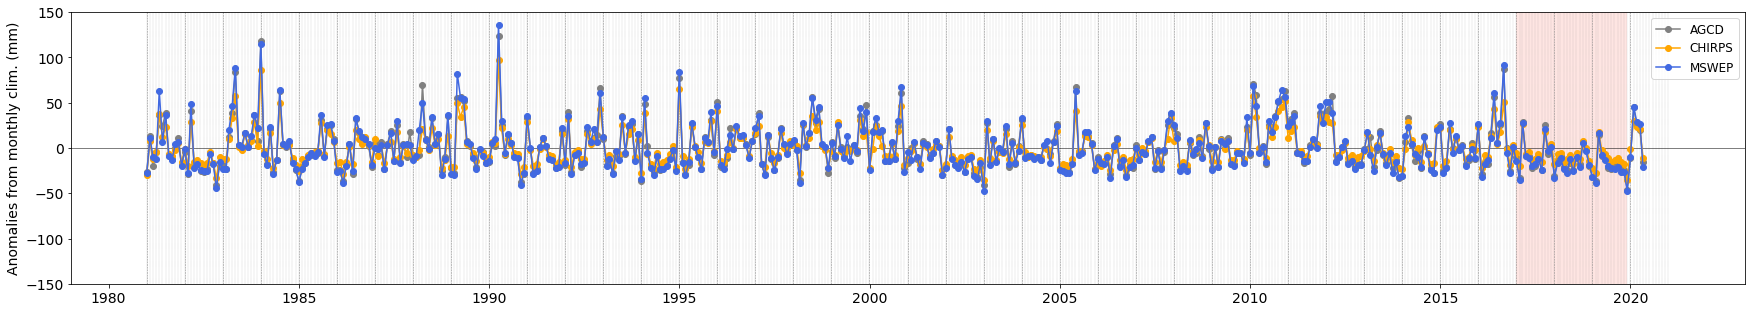

In [23]:
import pandas as pd
import datetime

out_dir = 'figures/drought_2017to2020/precip/'
col_sel = ['gray', 'orange', 'royalblue']
data_list = [da_agcd_monAnom_lt_regAvg, da_chirps_monAnom_lt_regAvg, da_mswep_monAnom_lt_regAvg]
data_names = ['AGCD', 'CHIRPS', 'MSWEP']

fig, ax = plt.subplots(nrows=1,ncols=1,
                    figsize=(30,5)) #width, height

seas_breaks = pd.date_range('1980-12-31', freq='M', periods=12*40+1).to_numpy()#.astype(float)
year_breaks = pd.date_range('1980-12-31', freq='Y', periods=40).to_numpy()
for xline in seas_breaks:
    plt.axvline(xline, color = 'grey', linestyle = '--', linewidth = 0.2)
for xline in year_breaks:
    plt.axvline(xline, color = 'grey', linestyle = '--', linewidth = 0.5)

plt.axhline(0, color = 'black', linestyle = 'solid', linewidth = 0.5)
for da, color, label in zip(data_list, col_sel, data_names):       
    plt.plot(da.time.values, da.values, marker='o', color=color, label=label)

    plt.xlabel('')
plt.ylabel('Anomalies from monthly clim. (mm)')
plt.ylim((-150, 150))
plt.legend(loc=0)

dx = data_list[0].time.values
fill = np.logical_and(data_list[0].time.values > np.datetime64(datetime.datetime(2016, 12, 31)),
               data_list[0].time.values < np.datetime64(datetime.datetime(2019, 12, 31)))
plt.fill_between(dx, plt.ylim()[0], plt.ylim()[1], where=fill, fc='salmon', alpha=0.2)


fig.savefig(out_dir + 'areaAvg_precip_anom_from_monClim_1981to2020.png', bbox_inches='tight')

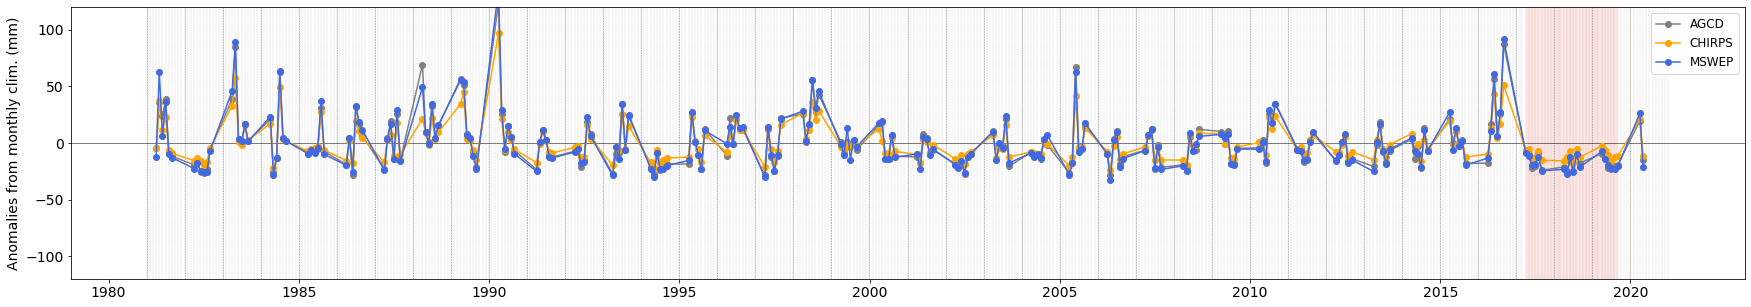

In [24]:
array_mon = da_agcd_monAnom_lt_regAvg['time.month'].values
AMJJAS_ind = np.isin(array_mon, [4, 5, 6, 7, 8, 9]) 

import pandas as pd

out_dir = 'figures/drought_2017to2020/precip/'
col_sel = ['gray', 'orange', 'royalblue']
data_list = [da_agcd_monAnom_lt_regAvg[AMJJAS_ind], da_chirps_monAnom_lt_regAvg[AMJJAS_ind], da_mswep_monAnom_lt_regAvg[AMJJAS_ind]]
data_names = ['AGCD', 'CHIRPS', 'MSWEP']

fig, ax = plt.subplots(nrows=1,ncols=1,
                    figsize=(30,5)) #width, height

seas_breaks = pd.date_range('1980-12-31', freq='M', periods=12*40+1).to_numpy()#.astype(float)
year_breaks = pd.date_range('1980-12-31', freq='Y', periods=40).to_numpy()
for xline in seas_breaks:
    plt.axvline(xline, color = 'grey', linestyle = '--', linewidth = 0.2)
for xline in year_breaks:
    plt.axvline(xline, color = 'grey', linestyle = '--', linewidth = 0.5)

plt.axhline(0, color = 'black', linestyle = 'solid', linewidth = 0.5)
for da, color, label in zip(data_list, col_sel, data_names):       
    plt.plot(da.time.values, da.values, marker='o', color=color, label=label)
             #ecolor='lightsteelblue', elinewidth=3, capsize=0)
#da_sm_monAnom_regAvg.plot.line(color="royalblue", marker="o", linewidth=1)
plt.xlabel('')
plt.ylabel('Anomalies from monthly clim. (mm)')
plt.ylim((-120, 120))
plt.legend(loc=0)

dx = data_list[0].time.values
fill = np.logical_and(data_list[0].time.values > np.datetime64(datetime.datetime(2016, 12, 31)),
               data_list[0].time.values < np.datetime64(datetime.datetime(2019, 12, 31)))
plt.fill_between(dx, plt.ylim()[0], plt.ylim()[1], where=fill, fc='salmon', alpha=0.2)

fig.savefig(out_dir + 'areaAvg_precip_anom_from_monClim_AMJJAS_1981to2020.png', bbox_inches='tight')

In [17]:
da_agcd_lt_monClim_masked = da_agcd_lt_monClim*da_agcd_mask
da_agcd_lt_monClim_regAvg = myfuncs.calc_areaAvg(da_agcd_lt_monClim_masked)

da_chirps_lt_monClim_masked = da_chirps_lt_monClim*da_chirps_mask
da_chirps_lt_monClim_regAvg = myfuncs.calc_areaAvg(da_chirps_lt_monClim_masked)

da_mswep_lt_monClim_masked = da_mswep_lt_monClim*da_mswep_mask
da_mswep_lt_monClim_regAvg = myfuncs.calc_areaAvg(da_mswep_lt_monClim_masked)

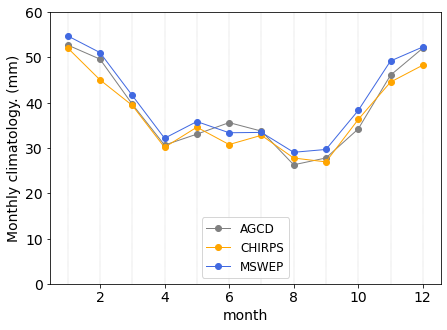

In [18]:
fig, ax = plt.subplots(nrows=1,ncols=1,
                    figsize=(7,5)) #width, height

data_list = [da_agcd_lt_monClim_regAvg, da_chirps_lt_monClim_regAvg, da_mswep_lt_monClim_regAvg]

for xline in range(1, 13):
    plt.axvline(xline, color = 'grey', linestyle = '--', linewidth = 0.2)

for da, color, label in zip(data_list, col_sel, data_names):  
    plt.plot(da.month.values, da.values, color=color, marker="o", linewidth=1, label=label)
plt.xlabel('month')
plt.ylabel('Monthly climatology. (mm)')
plt.ylim((0, 60))
plt.legend(loc=0)

fig.savefig(out_dir + 'precip_monClim.png', bbox_inches='tight', dpi=600)
fig.savefig(out_dir + 'precip_monClim.pdf', bbox_inches='tight', format='pdf')

### Anomalies in % (to mention in the text)

In [19]:
data_list = [da_agcd_monAnom_regAvg, da_chirps_monAnom_regAvg, da_mswep_monAnom_regAvg]
data_names = ['AGCD', 'CHIRPS', 'MSWEP']
da_anom_allDatamean = xr.concat(data_list, dim = 'data').mean('data')

data_list = [da_agcd_lt_monClim_regAvg, da_chirps_lt_monClim_regAvg, da_mswep_lt_monClim_regAvg]
data_names = ['AGCD', 'CHIRPS', 'MSWEP']
da_clim_allDatamean = xr.concat(data_list, dim = 'data').mean('data')

anom_seasMean = da_anom_allDatamean.resample(time="QS-DEC").mean()
clim_seasMean = da_clim_allDatamean.sel(month = da_anom_allDatamean['time.month'].values).rename({'month':'time'})\
.assign_coords({'time':da_anom_allDatamean.time.values}).resample(time="QS-DEC").mean()

df_anom = pd.DataFrame({'season':anom_seasMean.time.values,
                        'anomaly (mm)': np.round(anom_seasMean, 2).values,
                        'perc_anomaly (%)': np.round(anom_seasMean/clim_seasMean*100,1).values,
                       'climatology (mm)': np.round(clim_seasMean, 2).values})
print(df_anom)

out_file = '/g/data/w97/ad9701/drought_2017to2020/anomalies_csv/seas_precip_anomalies.csv'
df_anom.to_csv(out_file)

       season  anomaly (mm)  perc_anomaly (%)  climatology (mm)
0  2016-12-01        -12.93             -25.4             50.86
1  2017-03-01          3.73              10.6             35.21
2  2017-06-01        -14.94             -47.6             31.40
3  2017-09-01         -1.73              -4.7             36.98
4  2017-12-01        -12.08             -23.8             50.86
5  2018-03-01        -16.83             -47.8             35.21
6  2018-06-01        -14.50             -46.2             31.40
7  2018-09-01         -4.28             -11.6             36.98
8  2018-12-01        -26.89             -52.9             50.86
9  2019-03-01         -0.11              -0.3             35.21
10 2019-06-01        -18.77             -59.8             31.40
11 2019-09-01        -20.70             -56.0             36.98
12 2019-12-01         -3.30              -6.5             50.86
13 2020-03-01         10.53              29.9             35.21
14 2020-06-01         -1.35             

In [20]:
data_list = [da_agcd_monAnom_regAvg, da_chirps_monAnom_regAvg, da_mswep_monAnom_regAvg]
data_names = ['AGCD', 'CHIRPS', 'MSWEP']
da_anom_allDatamean = xr.concat(data_list, dim = 'data').mean('data')

data_list = [da_agcd_lt_monClim_regAvg, da_chirps_lt_monClim_regAvg, da_mswep_lt_monClim_regAvg]
data_names = ['AGCD', 'CHIRPS', 'MSWEP']
da_clim_allDatamean = xr.concat(data_list, dim = 'data').mean('data')

anom_mon = da_anom_allDatamean
clim_mon = da_clim_allDatamean.sel(month = da_anom_allDatamean['time.month'].values).rename({'month':'time'}).assign_coords({'time':da_anom_allDatamean.time.values})

df_anom_mon = pd.DataFrame({'month':anom_mon.time.values,
                        'anomaly (mm)': np.round(anom_mon, 2).values,
                        'perc_anomaly (%)': np.round(anom_mon/clim_mon*100,1).values,
                        'climatology (mm)': np.round(clim_mon, 2).values})
print(df_anom_mon)
out_file_mon = '/g/data/w97/ad9701/drought_2017to2020/anomalies_csv/mon_precip_anomalies.csv'
df_anom_mon.to_csv(out_file_mon)

        month  anomaly (mm)  perc_anomaly (%)  climatology (mm)
0  2016-12-01          0.96               1.9             50.86
1  2017-01-01        -10.12             -19.0             53.17
2  2017-02-01        -29.64             -61.1             48.55
3  2017-03-01         27.77              69.1             40.21
4  2017-04-01         -7.86             -25.4             30.96
5  2017-05-01         -8.71             -25.3             34.48
6  2017-06-01        -18.52             -55.8             33.22
7  2017-07-01        -16.98             -51.0             33.30
8  2017-08-01         -9.32             -33.7             27.69
9  2017-09-01        -21.41             -76.1             28.12
10 2017-10-01         20.97              57.9             36.24
11 2017-11-01         -4.74             -10.2             46.59
12 2017-12-01          2.72               5.3             50.86
13 2018-01-01        -27.00             -50.8             53.17
14 2018-02-01        -11.98             

## Looking at area averages in the three NRM cluster regions separately

In [30]:
import geopandas as gp
import regionmask

nrm_clusters = gp.read_file('/g/data/w97/ad9701/p_prob_analysis/processed_data/NRM_clusters/NRM_clusters.shp')

# for iDat in range(len(data_list)):
#     # create a mask of the polygon for the lat-long values in ds. The mask would contain '0' inside the region; nan otherwise
#     da_mask_zeros = regionmask.mask_3D_geopandas(geodataframe = nrm_clusters, lon_or_obj = data_list[iDat].lon.values, lat = data_list[iDat].lat.values)
#     # setting the points inside the region to 1
#     da_mask = xr.where(da_mask_zeros == 1, 1, np.nan)

#     # save the mask into a netcdf file
#     out_file = '/g/data/w97/ad9701/drought_2017to2020/' + data_names[iDat] + '_mask_NRM_clusters.nc'
#     da_mask.to_netcdf(out_file)

####################################
# read from saved files
####################################
# Central slopes, region = 0
# murray_basin, region = 2
# rangelands, region = 4

region_sel = [0, 2, 4]
region_names = ['Central Slopes', 'Murray Basin', 'Rangelands']

ds_mask_agcd = xr.open_dataset('/g/data/w97/ad9701/drought_2017to2020/AGCD_mask_NRM_clusters.nc')
da_NRMmask_agcd = ds_mask_agcd['mask'].sel(region = region_sel)

ds_mask_chirps = xr.open_dataset('/g/data/w97/ad9701/drought_2017to2020/CHIRPS_mask_NRM_clusters.nc')
da_NRMmask_chirps = ds_mask_chirps['mask'].sel(region = region_sel)

ds_mask_mswep = xr.open_dataset('/g/data/w97/ad9701/drought_2017to2020/MSWEP_mask_NRM_clusters.nc')
da_NRMmask_mswep = ds_mask_mswep['mask'].sel(region = region_sel)

In [31]:
# Anomalies in each NRM region

da_agcd_monAnom_masked_NRM = da_agcd_monAnom*da_agcd_mask*da_NRMmask_agcd
da_agcd_monAnom_regAvg_NRM = myfuncs.calc_areaAvg(da_agcd_monAnom_masked_NRM)

da_chirps_monAnom_masked_NRM = da_chirps_monAnom*da_chirps_mask*da_NRMmask_chirps
da_chirps_monAnom_regAvg_NRM = myfuncs.calc_areaAvg(da_chirps_monAnom_masked_NRM)

da_mswep_monAnom_masked_NRM = da_mswep_monAnom*da_mswep_mask*da_NRMmask_mswep
da_mswep_monAnom_regAvg_NRM = myfuncs.calc_areaAvg(da_mswep_monAnom_masked_NRM)

# long term (1981 to 2020) climatology in each NRM region

da_agcd_lt_monClim_masked_NRM = da_agcd_lt_monClim*da_agcd_mask*da_NRMmask_agcd
da_agcd_lt_monClim_regAvg_NRM = myfuncs.calc_areaAvg(da_agcd_lt_monClim_masked_NRM)

da_chirps_lt_monClim_masked_NRM = da_chirps_lt_monClim*da_chirps_mask*da_NRMmask_chirps
da_chirps_lt_monClim_regAvg_NRM = myfuncs.calc_areaAvg(da_chirps_lt_monClim_masked_NRM)

da_mswep_lt_monClim_masked_NRM = da_mswep_lt_monClim*da_mswep_mask*da_NRMmask_mswep
da_mswep_lt_monClim_regAvg_NRM = myfuncs.calc_areaAvg(da_mswep_lt_monClim_masked_NRM)

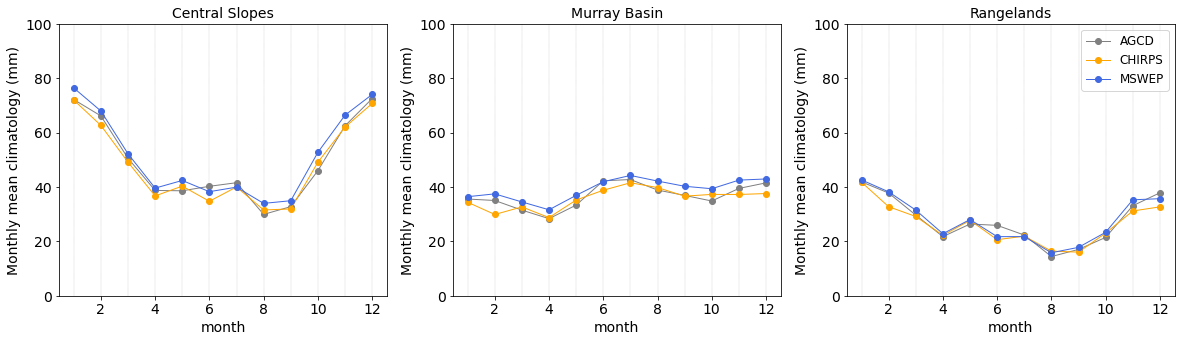

In [32]:
import pandas as pd

out_dir = 'figures/drought_2017to2020/precip/'
col_sel = ['gray', 'orange', 'royalblue']
data_list = [da_agcd_lt_monClim_regAvg_NRM, da_chirps_lt_monClim_regAvg_NRM, da_mswep_lt_monClim_regAvg_NRM]
data_names = ['AGCD', 'CHIRPS', 'MSWEP']

fig, ax = plt.subplots(nrows=1,ncols=3,
                    figsize=(20,5)) #width, height
for i in range(len(region_sel)):
    for xline in range(1, 13):
        ax[i].axvline(xline, color = 'grey', linestyle = '--', linewidth = 0.2)

    for da, color, label in zip(data_list, col_sel, data_names):  
        ax[i].plot(da.isel(region=i).month.values, da.isel(region=i).values, color=color, marker="o", linewidth=1, label=label)
    ax[i].set_xlabel('month')
    ax[i].set_ylabel('Monthly mean climatology (mm)')
    ax[i].set_ylim((0, 100))
    ax[i].set_title(region_names[i])

plt.legend(loc=0)

fig.savefig(out_dir + 'precip_monClim_NRMreg.png', bbox_inches='tight')

In [33]:
da_time_bymon = np.array(pd.to_datetime(da_agcd_monAnom_regAvg_NRM.time).to_period('M').to_timestamp().floor('D'))
da_agcd_monAnom_regAvg_NRM = da_agcd_monAnom_regAvg_NRM.assign_coords({'time': da_time_bymon})

da_time_bymon = np.array(pd.to_datetime(da_chirps_monAnom_regAvg_NRM.time).to_period('M').to_timestamp().floor('D'))
da_chirps_monAnom_regAvg_NRM = da_chirps_monAnom_regAvg_NRM.assign_coords({'time': da_time_bymon})

da_time_bymon = np.array(pd.to_datetime(da_mswep_monAnom_regAvg_NRM.time).to_period('M').to_timestamp().floor('D'))
da_mswep_monAnom_regAvg_NRM = da_mswep_monAnom_regAvg_NRM.assign_coords({'time': da_time_bymon})

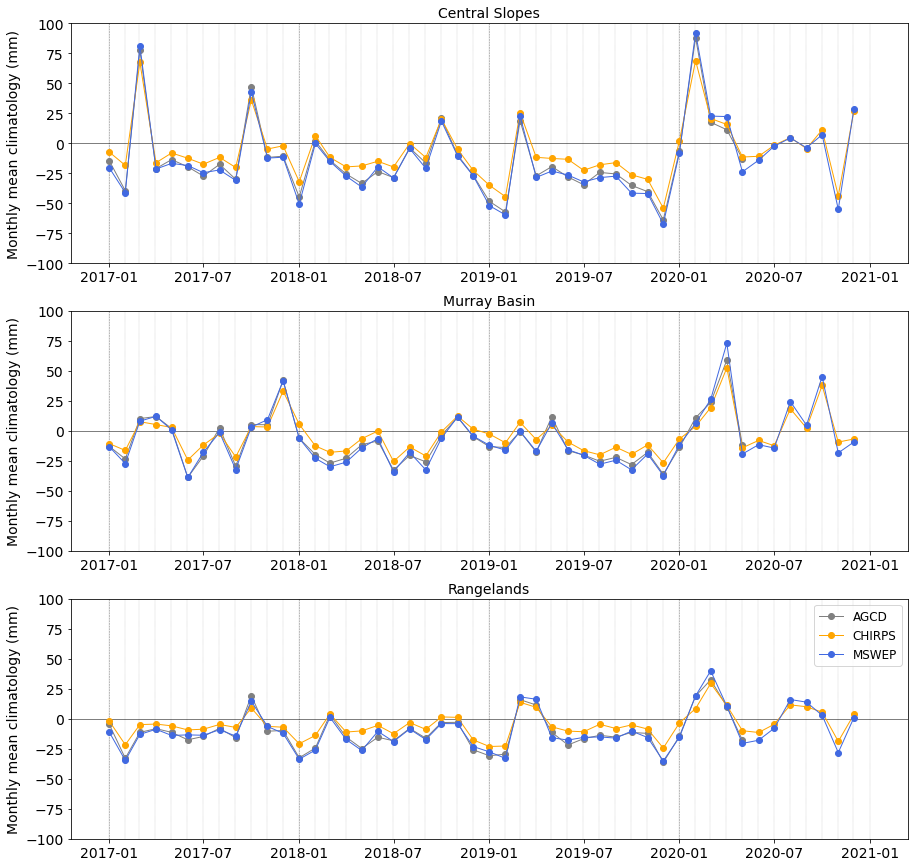

In [34]:
import pandas as pd

out_dir = 'figures/drought_2017to2020/precip/'
col_sel = ['gray', 'orange', 'royalblue']

data_list = [da_agcd_monAnom_regAvg_NRM, da_chirps_monAnom_regAvg_NRM, da_mswep_monAnom_regAvg_NRM]
data_names = ['AGCD', 'CHIRPS', 'MSWEP']

fig, ax = plt.subplots(nrows=3,ncols=1,
                    figsize=(15,15)) #width, height
for i in range(len(region_sel)):
    
    seas_breaks = pd.date_range('2016-12-31', freq='M', periods=12*4+1).to_numpy()#.astype(float)
    year_breaks = pd.date_range('2016-12-31', freq='Y', periods=4).to_numpy()
    for xline in seas_breaks:
        ax[i].axvline(xline, color = 'grey', linestyle = '--', linewidth = 0.2)
    for xline in year_breaks:
        ax[i].axvline(xline, color = 'grey', linestyle = '--', linewidth = 0.5)

    ax[i].axhline(0, color = 'black', linestyle = 'solid', linewidth = 0.5)
    for da, color, label in zip(data_list, col_sel, data_names):  
        ax[i].plot(da.isel(region=i).time.values, da.isel(region=i).values, color=color, marker="o", linewidth=1, label=label)

    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_ylim((-100, 100))
    ax[i].set_title(region_names[i])
    ax[i].set_ylabel('Monthly mean climatology (mm)')
plt.legend(loc=0)

fig.savefig(out_dir + 'precip_anom_from_monClim_NRMreg.png', bbox_inches='tight')

### Seasonal & Annual anomalies

#### Not required

### Is the monthly precip climatology dominated by the high rainfall regions in the east coast?

No

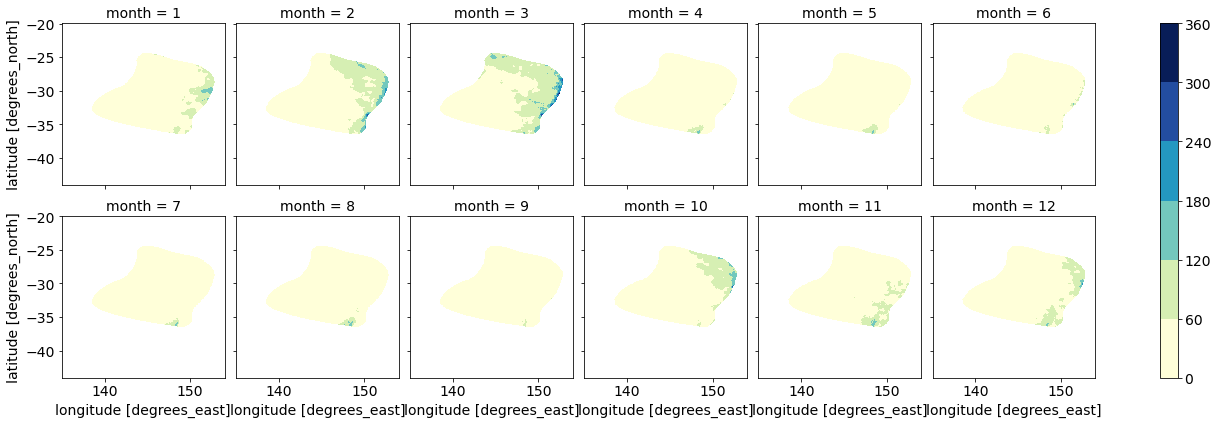

In [20]:
# only the southeast
lat_slice_small = slice(-20, -44)
lat_slice_small_rev = slice(-44, -20)
lon_slice_small = slice(135, 154)

data_lat_slices = {'AGCD': lat_slice_small_rev,
                   'CHIRPS': lat_slice_small_rev,
                   'MSWEP': lat_slice_small}

da_agcd_lt_monClim_masked.sel(lat=data_lat_slices['AGCD'], lon=lon_slice_small).plot(col = 'month', col_wrap =6, levels=8, cmap='YlGnBu')

### Don't see strong anomalies during the cool season from the above - why?

### What about area average SPI3?

In [88]:
2020-1911+1

110

### Yearly precip

In [2]:
data_dir = '/g/data/w97/ad9701/drought_2017to2020/precip_data/drought_focusRegavg/'
agcd_file = 'agcd_monthly_1900_2020.nc'
ds_agcd = xr.open_dataset(data_dir + agcd_file)
chirps_file = 'chirps_monthly_1981_2021.nc'
ds_chirps = xr.open_dataset(data_dir + chirps_file)
mswep_file = 'precipitation_mswep_monthly_1979_2021.nc'
ds_mswep = xr.open_dataset(data_dir + mswep_file)

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

SMALL_SIZE = 14
MEDIUM_SIZE = 14
BIGGER_SIZE = 14

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

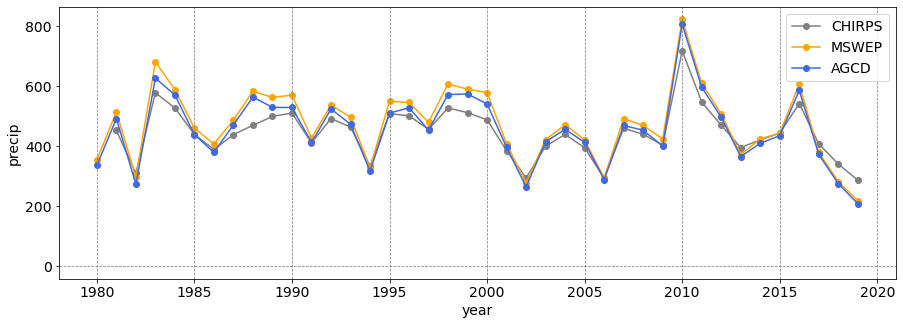

In [13]:
col_sel = ['gray', 'orange', 'royalblue']

ds_chirps['precip'].groupby('time.year').sum().sel(year = slice(1980, 2019)).plot(color = col_sel[0], marker="o", label='CHIRPS', size=5, aspect=3)
ds_mswep['precipitation'].groupby('time.year').sum().sel(year = slice(1980, 2019)).plot(color = col_sel[1], marker="o", label='MSWEP')
ds_agcd['precip'].groupby('time.year').sum().sel(year = slice(1980, 2019)).plot(color = col_sel[2], marker="o", label='AGCD')
plt.axhline(0, color = 'gray', linestyle='--', linewidth=0.75)
for xline in [1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020]:
    plt.axvline(xline, color = 'grey', linestyle = '--', linewidth = 0.75)
plt.legend()

out_dir = 'figures/drought_2017to2020/precip/'
plt.savefig(out_dir + 'precip_yearly_1980_2019.png', bbox_inches='tight')

In [7]:
ds_mswep

<xarray.Dataset>
Dimensions:        (time: 508)
Coordinates:
  * time           (time) datetime64[ns] 1979-02-01 1979-03-01 ... 2021-05-01
Data variables:
    precipitation  (time) float64 ...